<a href="https://colab.research.google.com/github/retazo0018/Deep-Learning/blob/master/fashion_mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [0]:
data = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/Top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
# 28 * 28 pixel array
print(train_images[9])

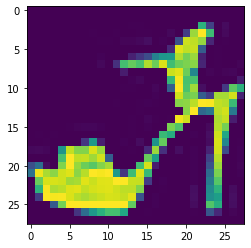

In [6]:
plt.imshow(train_images[9])
plt.show()

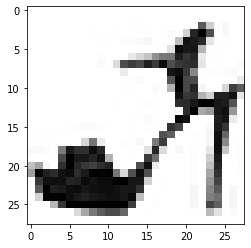

In [7]:
plt.imshow(train_images[9], cmap=plt.cm.binary)
plt.show()

In [0]:
# shrinking the pixel values
train_images = train_images/255
test_images = test_images/255

In [0]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(128, activation="relu"),
                          keras.layers.Dense(10, activation="softmax")
])

In [0]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics= ["accuracy"])

In [18]:
 model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.4972 - acc: 0.8248
Epoch 2/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3737 - acc: 0.8647
Epoch 3/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3384 - acc: 0.8759
Epoch 4/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3143 - acc: 0.8844
Epoch 5/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2963 - acc: 0.8903


In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Tested Acc:", test_acc)

10000/10000 [==============================] - 0s 32us/sample - loss: 0.3466 - acc: 0.8740
Tested Acc: 0.874


In [20]:
prediction = model.predict(test_images)
print(prediction)

[[6.7329483e-06 2.1079538e-07 2.7391605e-08 ... 1.0228930e-01
  8.5216813e-04 8.9229459e-01]
 [4.6843463e-05 2.1798727e-10 9.9496716e-01 ... 3.9496262e-14
  1.8693913e-07 1.6692142e-12]
 [1.1500629e-06 9.9999857e-01 1.4268067e-11 ... 3.2370707e-17
  6.8370852e-12 7.9728487e-13]
 ...
 [1.6942964e-03 2.0276436e-06 5.0383052e-03 ... 7.4138959e-05
  9.8486614e-01 4.4849106e-08]
 [1.4041957e-07 9.9918991e-01 2.0328133e-09 ... 4.1113054e-11
  7.7605611e-09 8.2002295e-08]
 [7.9786056e-04 2.7925073e-06 1.2630093e-04 ... 8.9432493e-02
  2.5065750e-02 6.0492480e-04]]


In [21]:
print(prediction[0])

[6.7329483e-06 2.1079538e-07 2.7391605e-08 1.9283394e-08 5.4052668e-07
 4.5555350e-03 9.1067034e-07 1.0228930e-01 8.5216813e-04 8.9229459e-01]


In [22]:
print(np.argmax(prediction[0]))

9


In [23]:
print(class_names[np.argmax(prediction[0])])

Ankle boot


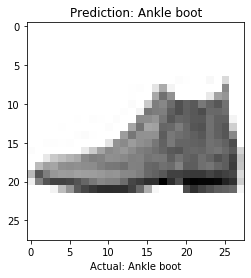

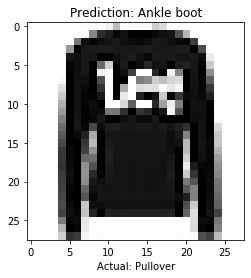

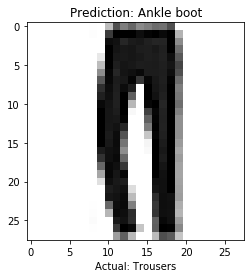

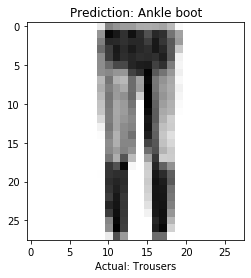

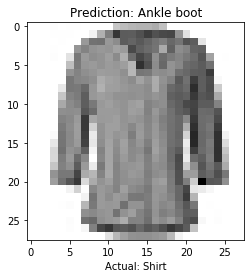

In [26]:
for i in range(5):
  plt.grid(False)
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.xlabel("Actual: " + class_names[test_labels[i]])
  plt.title("Prediction: " + class_names[np.argmax(prediction[0])])
  plt.show()